# Intro
* In this notebook we will be
        1. Creating a pipeline 
        2. Will do Hyper Parameter Tuning
        3. Using GridSearchCV

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris_df= load_iris()


In [3]:

X_train,X_test,y_train,y_test=train_test_split(iris_df.data,iris_df.target,test_size=0.3,random_state=0)

## Pipelines Creation
1. Data Preprocessing by using Standard Scaler
2. Reduce Dimension using PCA
3. Apply  Classifier

In [4]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [5]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [6]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [7]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [8]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [9]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [10]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8666666666666667
Decision Tree Test Accuracy: 0.9111111111111111
RandomForest Test Accuracy: 0.9111111111111111


In [11]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Decision Tree


# Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

In [12]:
# Import the GridSerachCV

from sklearn.model_selection import GridSearchCV

In [13]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]


# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [14]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('classifier', LogisticRegression(solver='saga'))])
The mean accuracy of the model is: 0.9555555555555556


# Notes for Better understanding
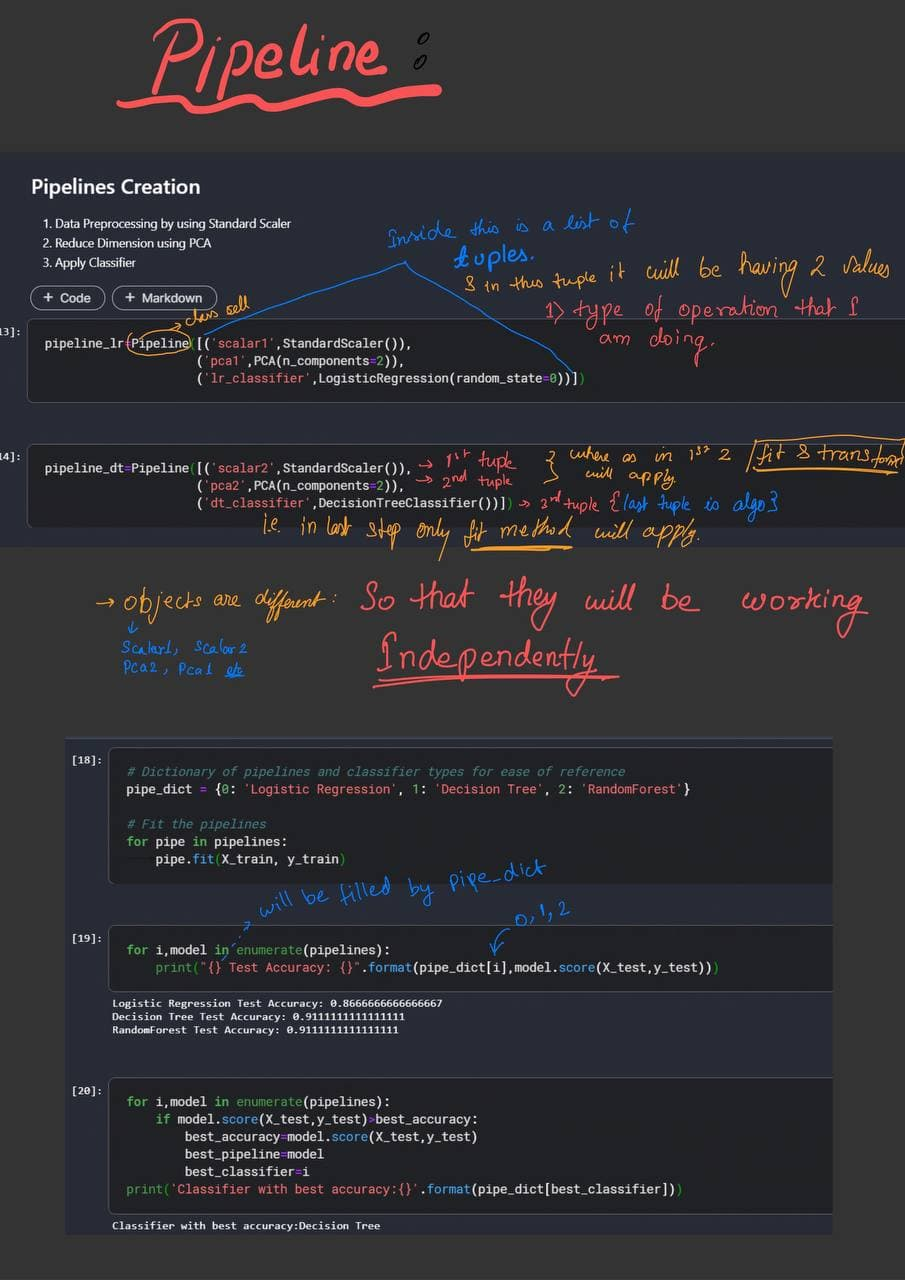

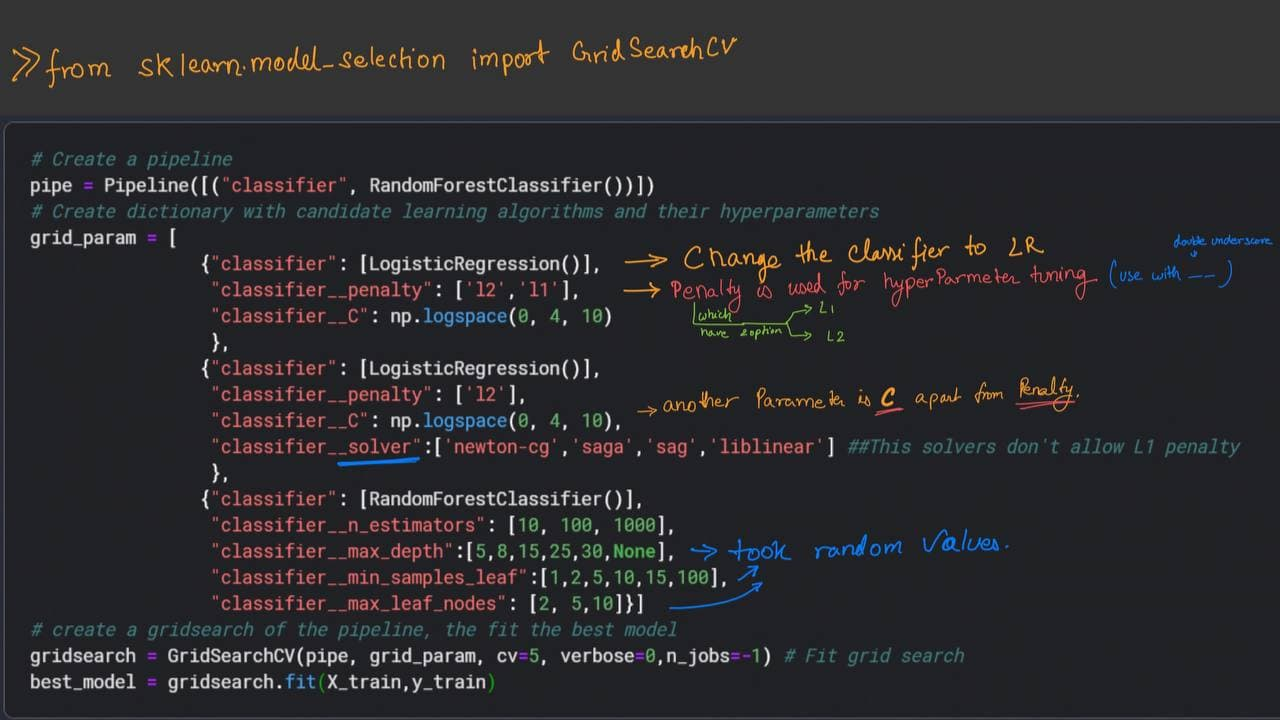

## Few Key points:
* No of n_jobs don't affect our accuracy

# Reference 
* [Source 1 Krish Naik github](https://github.com/krishnaik06/Pipelines-Using-Sklearn/blob/master/SklearnPipeline.ipynb)
* [Source 2 Krish explaining about Hyper Parameter Tuning](https://www.youtube.com/watch?v=DHxsNrL7Zfw)